<a href="https://colab.research.google.com/github/RohanSubramani/Miscellaneous/blob/main/rs4126_RL_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from tqdm import tqdm

# Problem 1
Chess as an MDP.

Chess can be modeled as an MDP. The set of states S can be the set of all possible arrangements of all possible subsets of pieces on the board (even though not all of these arrangements are actually attainable in a game of chess).The set of actions A can be the set of all legal moves that the agent player (we are treating the opponent as the environment) can make from any of the states in S - that is, the union of "the set of legal moves in state s" over all states s in S. One option for the rewards is to give 0 reward anytime there is no checkmate, +1 when the agent checkmates their opponent, and -1 when the opponent checkmates the agent. There are other more sophisticated options that include offering rewards for intermediate stages related to losing or capturing pieces and board position, but this is simpler and still works. The transition probabilities P(s',r|s,a) are determined by the opponent's probability distribution over moves given each board position they encounter, since the agent moves (takes action a in state s), then the opponent moves (producing a new state s' and a reward r), and then it is the agent's turn again.

# Problem 2
Expressing state values and state-action values in terms of each other.

2a: 
$v_\pi (s) = \sum\limits_a \pi(a|s) q_\pi (s,a) $

2b: 
$q_\pi (s,a) = \sum\limits_{r,s'} P(s',r|s,a)[r + \gamma v_\pi (s')] $

2c:
$v_* (s) = \max\limits_a q_* (s,a) $

2d:
$q_* (s,a) = \sum\limits_{r,s'} P(s',r|s,a)[r + \gamma v_* (s')] $

2a and 2c are fairly intuitive ways of converting state-action values into state values. 2b follows from 2a and the following:

$v_\pi (s) = \sum\limits_a \pi(a|s) \sum\limits_{r,s'} P(s',r|s,a) [r + \gamma v_\pi (s')]$

2d is that same as 2b except $v_\pi$ is substituted out for $v_*$.

# Problem 3
Special quantities in gambler MDP problem.

Importantly, the probability of winning a bet is given as 0.4, which is smaller than 0.5, so the game is biased against the gambler. Given that they want to win money, their best strategy is to hope to get lucky on a few risky bets, because the expected outcome is always for them to lose money but the variance of outcomes is higher if it depends on fewer bets. Then, the key idea is that there are unusually direct paths from 25, 50, and 75 to the goal of 100. From 25, the gambler could get to 100 if they win two all-or-nothing bets in a row. From 50, they can get to 100 if one all-in bet pays off. From 75, they can win by either winning a bet of 25, or losing a bet of 25 and then winning a bet of 50. For values close to these, it makes sense to bet less, because slowly accumulating more money could get the gambler to a better special quantity (notice that the probability of winning from 25 is lower than from 50, which in turn is lower than at 75, which itself is obviously lower than getting directly to 100), while slowly losing money from above a special quantity could bring them back down to that special quantity. Powers of 2 are special because the gambler is capable of doubling their money when they bet it all - this is why 25 is special but e.g. 20 is not.

# Problem 4
Dynamic Programming with graphs.

In cases where the meaning is not ambiguous, I will refer to nodes by their indices, e.g. instead of saying $v_i$ I will just say i.

## 4a
The given relationship can be described in words as saying "The length of the shortest path from i to j is equal to the length of the shortest path that first gets from i to some node within one edge of j as efficiently as possible and then goes to j." Ignoring edge cases where there are relevant paths with no intermediate nodes for a moment, this is clearly correct: any path to j has to first be within one edge of j, and obviously the shortest path through any node must involve getting to that node as efficiently as possible.

If i is adjacent to j, or if i = j, this relationship still holds. All that is needed is to let $d_{il}$ and/or $d_{lj}$ be 0 by making l equal to i and/or j.

The requirements for Dynamic Programming lead us to the expression in the following ways:

1. One prereq for DP is that it needs to be possible to decompose problems into subproblems of a similar form. This appears in the given relationship since the shortest distance between two nodes (i and j) is computed using another shortest distance between two nodes (i and l).
2. Another prereq for DP is that the subproblems overlap, which appears here since the paths that have these shortest distances are the same except for adding or removing one edge at a time.
3. The third prereq for DP is the Markov property, which appears here in that only the shortest distance from i to l needs to be known without further details about how that distance was computed.

## 4b
$D^{(0)}$ is the n x n matrix with 0s along the diagonal and infinity everywhere else. $D^{(1)}$ is the same as the matrix D given in the problem description.

## 4c

Matrix form of Bellman equation: $D^* = D^* \star D$

This is expressing the Bellman relationship because the expression for each entry $D^*_{ij} = (D^* \star D)_{ij} = (D^*_{i1} + D_{1j}) ∨ (D^*_{i2} + D_{2j}) ∨ ... ∨ (D^*_{in} + D_{nj})$ reduces to $d^*_{ij} = \min\limits_l (d^*_{il}+d_{lj})$.

## 4d


(I felt that the most natural order to answer the questions for this part was different than the order in which they were posed, so there'll be a bit of jumping back and forth.)

The simplest way to use the matrices $D^{(k)}$ to get $D^*$ is to simply keep increasing k until we get $D^{(k)} = D^*$. Specifically, we know $D^{(n-1)} = D^*$ because the shortest path from i to j in a graph with n nodes always has at most n-1 edges - any path with more edges than that must visit at least one node multiple times, which would mean there was a cycle in the path, and that cycle could be removed to make a shorter path.

Next, let's show that $D^{(k+1)} = D^{(k)} \star D$.

The expression for each entry is $D^{(k+1)}_{ij} = (D^{(k)} \star D)_{ij} = (D^{(k)}_{i1} + D_{1j}) ∨ (D^{(k)}_{i2} + D_{2j}) ∨ ... ∨ (D^{(k)}_{in} + D_{nj})$, which reduces to $d^{(k+1)}_{ij} = \min\limits_l (d^{(k)}_{il}+d_{lj})$.

In words, this states "The length of the shortest (distance) path from i to j in at most k+1 edges is equal to the length of the shortest (distance) path that first gets from i to some node within one edge of j as efficiently as possible within at most k steps and then goes to j." This is clearly correct, for basically the same reasons given in part a.

We know that $D^{(1)} = D^{\star 1} = D$, $D^{(k+1)} = D^{(k)} \star D$, and $D^{\star (k+1)} = D^{\star k} \star D$.

Therefore, $D^{(k)} = D^{\star k}$ for all k, and $D^{(n-1)} = D^{\star (n-1)}$.

This suggests a basic DP algorithm for computing $D^*$: simply take the min-sum product of D with itself n-1 times.

In [4]:
# I'll do part e separately below, by copying and pasting this code and then editing it

def get_all_shortest_paths(D):
  # D should be an n x n numpy array with a 0 diagonal
  n = len(D)
  assert type(D) == np.ndarray, f"type(D) should be np.ndarray, but type(D)={type(D)}."
  for i in range(n): 
    assert D[i][i] == 0, f"Diagonal must be 0s, D[{i}][{i}]={D[i][i]}"
    assert len(D[i]) == n, f"len(D[i]) should be {n}, but len(D[i])={len(D[i])}."
  prev_D_k = D # Start with D^(1)
  D_k = np.zeros((n,n))
  for k in range(2,n): # result of each iteration will be D^(k), so after k = n-1 we will have D^(n-1)
    for i in range(n):
      for j in range(n):
        D_k[i][j] = np.min(prev_D_k[i]+np.transpose(D[:,j]))
    prev_D_k = D_k
  return D_k

In [6]:
# Tests - I drew out the graph below and verified the output, the code seems to be correct.

D = [[0,3,9,999],[999,0,5,1],[4,999,0,999],[50,999,999,0]] # 999 is a large distance to represent "no edge"
D = np.array(D)
print(f"Input:\n{D}\n")
print(f"Result:\n{get_all_shortest_paths(D)}\n")

n=100
D = np.random.rand(n,n)
for i in range(n): D[i][i] = 0 # Distance from a node to itself should be 0
print(f"Input:\n{D}\n")
print(f"Result:\n{get_all_shortest_paths(D)}")

Input:
[[  0   3   9 999]
 [999   0   5   1]
 [  4 999   0 999]
 [ 50 999 999   0]]

Result:
[[ 0.  3.  8.  4.]
 [ 9.  0.  5.  1.]
 [ 4.  7.  0.  8.]
 [50. 53. 58.  0.]]

Input:
[[0.         0.43144061 0.12647903 ... 0.36282421 0.3478035  0.65860323]
 [0.11807249 0.         0.1731023  ... 0.42136358 0.49683569 0.60913258]
 [0.89193664 0.76996847 0.         ... 0.23183131 0.31858813 0.22973511]
 ...
 [0.01483791 0.76294941 0.69387785 ... 0.         0.85717016 0.0215575 ]
 [0.02811043 0.29952071 0.68453229 ... 0.60476698 0.         0.26337875]
 [0.5264719  0.09112022 0.74086415 ... 0.57564888 0.31668157 0.        ]]

Result:
[[0.         0.01929154 0.07274434 ... 0.05247937 0.05655931 0.06981769]
 [0.05154013 0.         0.07880085 ... 0.04713651 0.07294612 0.06869401]
 [0.05257857 0.05064693 0.         ... 0.04058279 0.044774   0.06214029]
 ...
 [0.01483791 0.03412945 0.05497487 ... 0.         0.04840563 0.0215575 ]
 [0.02811043 0.04740196 0.08222746 ... 0.0642162  0.         0.0857737 ]

## 4e

Essenially, while computing $D^{(k)}$, there is a step when it is necessary to determine the smallest of several total distances required to go from i to l and l to j, for various intermediate nodes l. To compute $P^{(k)}$ alongside, we just need to compute the argmin of these distances in addition to the min: that is, in addition to computing the shortest distance itself, we keep track of which node l produces that shortest distance. Further details are in the code below. Also, there are some weird edge cases that need to be dealt with which are also in the code and comments below.

In [31]:
def get_D_k_and_P_k(D):
  # D should be an n x n numpy array with a 0 diagonal and 999's for missing edges
  n = len(D)
  assert type(D) == np.ndarray, f"type(D) should be np.ndarray, but type(D)={type(D)}."
  for i in range(n): 
    assert D[i][i] == 0, f"Diagonal must be 0s, D[{i}][{i}]={D[i][i]}"
    assert len(D[i]) == n, f"len(D[i]) should be {n}, but len(D[i])={len(D[i])}."
  prev_D_k = D # Start with D^(1)
  D_k = np.zeros((n,n))
  P_k = np.zeros((n,n)) # 0 indicates no predecessor
  for i in range(n): P_k[i][i] = i+1 # Shortest path from i to itself 'starts' at i (but indexing starts at 0, so use i+1)
  for k in range(2,n): # result of each iteration will be D^(k), so after k = n-1 we will have D^(n-1)
    for i in range(n):
      for j in range(n):
        if i == j: continue # Already set the diagonal values above
        sum = prev_D_k[i]+np.transpose(D[:,j])
        D_k[i][j] = np.min(sum)
        if P_k[i][j] == 0 and np.argmin(sum) == j: # This only happens if there is an edge from i to j that is the shortest single edge path
          P_k[i][j] = i + 1
        if np.argmin(sum) != j: 
          # np.argmin(sum) == j would mean this path was found in an earlier iteration, we don't want to make the target node the predecessor 
          P_k[i][j] = np.argmin(sum) + 1        
    prev_D_k = D_k
  for i in range(n):
    for j in range(n):
      if D_k[i][j] == 999: P_k[i][j] = 0
  return D_k, P_k

In [35]:
# Tests - I drew out the graphs below and verified the outputs, the code seems to be correct.

D = [[0,3,9,999],[999,0,5,1],[4,999,0,999],[50,999,999,0]]
D = np.array(D)
print(f"Input:\n{D}\n")
D_k, P_k = get_D_k_and_P_k(D)
print(f"D_k:\n{D_k}\n")
print(f"P_k:\n{P_k}\n")

D = [[0,3,3,999,999],[999,0,4,999,999],[999,999,0,2,999],[1,999,999,0,999],[999,999,999,999,0]]
D = np.array(D)
print(f"Input:\n{D}\n")
D_k, P_k = get_D_k_and_P_k(D)
print(f"D_k:\n{D_k}\n")
print(f"P_k:\n{P_k}\n")

# n=100
# D = np.random.rand(n,n)
# for i in range(n): D[i][i] = 0 # Distance from a node to itself should be 0
# print(f"Input:\n{D}\n")
# D_k, P_k = get_D_k_and_P_k(D)
# print(f"D_k:\n{D_k}\n")
# print(f"P_k:\n{P_k}\n")

Input:
[[  0   3   9 999]
 [999   0   5   1]
 [  4 999   0 999]
 [ 50 999 999   0]]

D_k:
[[ 0.  3.  8.  4.]
 [ 9.  0.  5.  1.]
 [ 4.  7.  0.  8.]
 [50. 53. 58.  0.]]

P_k:
[[1. 1. 2. 2.]
 [3. 2. 2. 2.]
 [3. 1. 3. 2.]
 [4. 1. 2. 4.]]

Input:
[[  0   3   3 999 999]
 [999   0   4 999 999]
 [999 999   0   2 999]
 [  1 999 999   0 999]
 [999 999 999 999   0]]

D_k:
[[  0.   3.   3.   5. 999.]
 [  7.   0.   4.   6. 999.]
 [  3.   6.   0.   2. 999.]
 [  1.   4.   4.   0. 999.]
 [999. 999. 999. 999.   0.]]

P_k:
[[1. 1. 1. 3. 0.]
 [4. 2. 2. 3. 0.]
 [4. 1. 3. 3. 0.]
 [4. 1. 1. 4. 0.]
 [0. 0. 0. 0. 5.]]



To find the shortest path from i to j given $P^*$, look at $P^*_{ij}$ to find the last vertex to visit before j. Call that k. Then look at $P^*_{ik}$ to find the last vertex to visit before k. Repeat this process until the last vertex to visit before some other vertex is i, and then reverse the order of the backwards traversal to get the shortest path from i to j. This is implemented below.

In [57]:
def get_shortest_path(D_star,P_star,i,j):
  i -= 1
  j -= 1 # To allow node numbering args to index from 1 
  if not (D_star[i][j] < 999): 
    print(f"No path from {i+1} to {j+1}")
    return []
  back_trav = [int(j)] # backwards traversal
  while abs(back_trav[-1] - i) > 1e-4:
    back_trav.append(int(P_star[i][back_trav[-1]]-1)) # Again dealing with mismatch between 0 and 1 indexing
  result = back_trav[::-1] + np.ones(len(back_trav))
  return [int(r) for r in result]

print(get_shortest_path(D_k,P_k,2,1))
print(get_shortest_path(D_k,P_k,3,2))
print(get_shortest_path(D_k,P_k,1,4))
print(get_shortest_path(D_k,P_k,1,5))

[2, 3, 4, 1]
[3, 4, 1, 2]
[1, 3, 4]
No path from 1 to 5
[]


# Problem 5
Ski-shop inventory problem

In [94]:
class SkiShopInventory():
  def __init__(self, gamma=0.9):
    self.months = ['Sep','Oct','Nov','Dec','Jan','Feb','Mar']
    self.demand_avgs = [0,20,40,50,35,25,5]
    self.demand_avgs_dict = dict(zip(self.months,self.demand_avgs))
    self.gamma=gamma

    # self.states = [(month,stock) for month in self.months for stock in range(100)]

  def part_a(self):
    q_values = {}
    MIN_ACTION = 5 # because the given policy for part 1 involves always buying at least 5 skis
    for month in tqdm(self.months[::-1]):
      max_stock = self.get_max_stock(month) # Never exceeds the 100 limit with this policy, max is 86
      if month == 'Mar':
        for stock in range(max_stock+1):
          action = 0 # Can't buy skis at end of Mar
          key = ((month,stock),action) 
          q_values[key] = 300*stock # Just the fire sale
      elif month == "Feb":
        for stock in range(max_stock+1): 
          action = 0 # Buys nothing at end of Feb / start of March, the interval [5,2.5] is nonsensical
          key = ((month,stock),action) 
          demand_probs = []
          for demand in range(stock+action): # Goes up to stock - 1
            demand_probs.append(stats.poisson.pmf(demand,self.demand_avgs_dict[month]))
          demand_probs.append(1-sum(demand_probs)) # Probability that the entire stock sells 
          q_value = 0
          for demand in range(len(demand_probs)):
            q_value += demand_probs[demand]*(700*demand + self.gamma*300*(stock+action-demand)) # Treats demand > stock the same as demand = stock
          q_values[key] = q_value
      else:
        month_idx = self.months.index(month)
        next_month = self.months[month_idx+1]
        next_next_month = self.months[month_idx+2]
        for stock in range(max_stock+1):
          for action in range(MIN_ACTION,self.demand_avgs_dict[next_month]//2+1):
            key = ((month,stock),action)
            demand_probs = []
            for demand in range(stock+action):
              demand_probs.append(stats.poisson.pmf(demand,self.demand_avgs_dict[next_month]))
            demand_probs.append(1-sum(demand_probs)) # Probability that the entire stock sells
            q_value = 0
            for demand in range(len(demand_probs)):
              new_stock = stock + action - demand
              reward = (700*demand)-(500*action)
              if next_month == 'Feb':
                q_value = demand_probs[demand]*(reward + self.gamma*q_values[((next_month,new_stock),0)])
              else:
                next_max_action = self.demand_avgs_dict[next_next_month]//2
                prob_next_action = 1/(next_max_action-5+1)
                for next_action in range(MIN_ACTION,next_max_action+1):
                  q_value += demand_probs[demand]*prob_next_action*(reward + self.gamma*q_values[((next_month,new_stock),next_action)]) 
                  # Treats demand > stock the same as demand = stock
            q_values[key] = q_value
    # All reachable q_values have been added, now compute V0 = V('Sep',0)
    V0 = 0
    max_action = self.demand_avgs_dict['Oct']//2
    prob_action = 1/(max_action-5+1)
    for action in range(MIN_ACTION,max_action+1):
      V0 += prob_action*q_values[(('Sep',0),action)]
    return V0, q_values

  def get_max_stock(self,month):
    demand_avgs_so_far = self.demand_avgs[:self.months.index(month)+1]
    max_order = lambda i: demand_avgs_so_far[i] // 2
    return sum([(max_order(i) if max_order(i) >= 5 else 0) for i in range(len(demand_avgs_so_far))])
    # I interpreted the fact that lambda/2 < 5 in March to mean the store owner buys nothing at the end of Feb / start of March.

  def part_b(self):
    q_values, values, pi = {}, {}, {}
    for month in tqdm(self.months[::-1]):
      if month == 'Mar':
        for stock in range(101):
          action = 0 # Can't buy skis at end of Mar
          q_key = ((month,stock),action) 
          q_values[q_key] = 300*stock # Just the fire sale
          state = (month,stock)
          values[state] = 300*stock
          # No need to assign a value to pi here, this part is deterministic
      else:
        month_idx = self.months.index(month)
        next_month = self.months[month_idx+1]
        max_stock = 0 if month == 'Sep' else 100
        # next_next_month = self.months[month_idx+2]
        for stock in range(max_stock+1):
          state = (month,stock)
          qs_for_state = []
          for action in range(100-stock+1):
            q_key = ((month,stock),action)
            q_value = 0
            demand_probs = []
            for demand in range(stock+action):
              demand_probs.append(stats.poisson.pmf(demand,self.demand_avgs_dict[next_month]))
            demand_probs.append(1-sum(demand_probs)) # Probability that the entire stock sells
            for demand in range(len(demand_probs)):
              new_stock = stock + action - demand
              reward = (700*demand)-(500*action)
              if next_month == 'Mar':
                q_value += demand_probs[demand]*(reward + self.gamma*q_values[((next_month,new_stock),0)])
              else:
                poss_q_values = [demand_probs[demand]*(reward + self.gamma*q_values[((next_month,new_stock),next_action)]) \
                                 for next_action in range(100-new_stock+1)] # Treats demand > stock the same as demand = stock
                q_value += max(poss_q_values)   # This is computing q*
            q_values[q_key] = q_value
            qs_for_state.append(q_value)
          values[state] = max(qs_for_state)
          pi[state] = np.argmax(qs_for_state)
    for month in self.months[:-1]: # Skip March
      try:
        self.make_plot(month,pi)
      except Exception as e:
        print(e)
    return q_values, values, pi

  def make_plot(self,month,pi):
    max_stock = 0 if month == 'Sep' else 100 
    optimal_actions = [pi[(month,stock)] for stock in range(max_stock+1)]
    if month == 'Sep': plt.scatter(range(max_stock+1),optimal_actions)
    else: plt.plot(range(max_stock+1),optimal_actions)
    plt.title(f"Optimal actions vs stock at end of {month}")
    plt.xlabel("Incoming stock")
    plt.ylabel("Optimal number of skis to buy")
    plt.show()
  
  def simulate(self, pi, runs):
    profit_per_run = []
    for run in range(runs):
      month_idx, stock, profit = 0,0,0
      while month_idx <= len(self.months)-2: # Until the end of Feb:
        month = self.months[month_idx] # Starts at 'Sep', is 'Feb' in last iteration. Each iterations simulates the month after this.
        next_month = self.months[month_idx+1]
        state = (month,stock) # Starts at ('Sep',0)
        action = pi[state]
        demand_avg_next_month = self.demand_avgs_dict[next_month]
        demand = stats.poisson.rvs(demand_avg_next_month)
        sales = min(demand,stock+action)
        profit += 700*sales - 500*action
        stock = stock+action-sales
        month_idx += 1
      # Fire sale
      profit += 300*stock
      profit_per_run.append(profit)
    return profit_per_run

  def simulate_discounted(self, pi, runs):
    profit_per_run = []
    for run in range(runs):
      month_idx, stock, profit = 0,0,0
      while month_idx <= len(self.months)-2: # Until the end of Feb:
        month = self.months[month_idx] # Starts at 'Sep', is 'Feb' in last iteration. Each iterations simulates the month after this.
        next_month = self.months[month_idx+1]
        state = (month,stock) # Starts at ('Sep',0)
        action = pi[state]
        demand_avg_next_month = self.demand_avgs_dict[next_month]
        demand = stats.poisson.rvs(demand_avg_next_month)
        sales = min(demand,stock+action)
        profit += (self.gamma**(month_idx))*(700*sales - 500*action)
        stock = stock+action-sales
        month_idx += 1
      # Fire sale
      profit += (self.gamma**(month_idx))*300*stock
      profit_per_run.append(profit)
    return profit_per_run

## 5a

In [107]:
ssi = SkiShopInventory()

V0, q_values = ssi.part_a()
print(f"\nV_pi(Sep,0) = {V0}\n") #q_values = {q_values}")

100%|██████████| 7/7 [00:05<00:00,  1.39it/s]


V_pi(Sep,0) = 8898.576693535459



## 5b

100%|██████████| 7/7 [02:25<00:00, 20.79s/it]


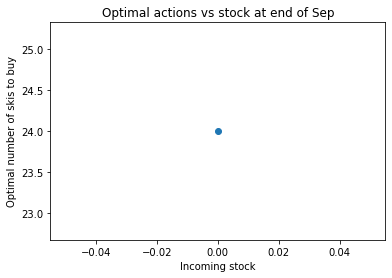

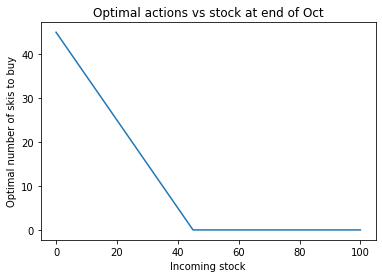

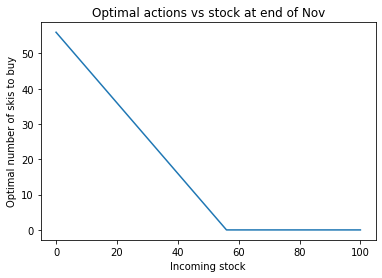

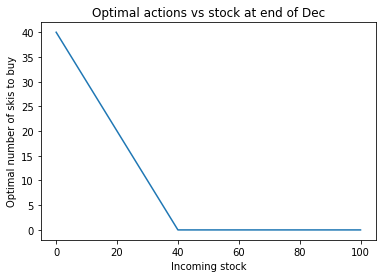

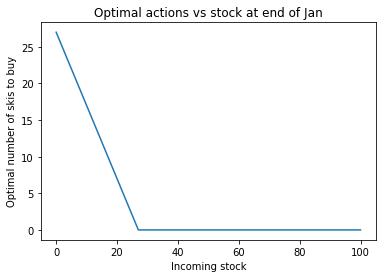

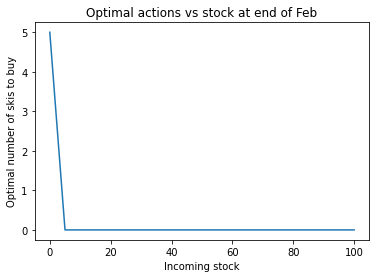

In [89]:
q_star, v_star, pi_star = ssi.part_b()

In [103]:
# A bonus useful comparison
print("Optimal number of skis to have at the end of each month, and average demand in the next month:\n")
for month in ssi.months[:-1]:
  next_month = ssi.months[ssi.months.index(month)+1]
  print(f"{month}: Optimal={pi[(month,0)]}, Average={ssi.demand_avgs_dict[next_month]}") 

Optimal number of skis to have at the end of each month, and average demand in the next month:

Sep: Optimal=24, Average=20
Oct: Optimal=45, Average=40
Nov: Optimal=56, Average=50
Dec: Optimal=40, Average=35
Jan: Optimal=27, Average=25
Feb: Optimal=5, Average=5


## 5c

In [104]:
# This simulation does not discount profits

profits = ssi.simulate(pi_star,1000)
print(f"Average: {np.mean(profits)}\nStandard deviation: {np.std(profits)}")

Average: 33748.6
Standard deviation: 2241.847015297877


In [105]:
# This simulation discounts profits by gamma^month_idx

profits_discounted = ssi.simulate_discounted(pi_star,1000)
print(f"Average: {np.mean(profits_discounted)}\nStandard deviation: {np.std(profits_discounted)}")

Average: 26372.063094700003
Standard deviation: 2185.846064882694


In [96]:
print(v_star[('Sep',0)])

26281.990738559616


The average profit without any discounting in the simulation was 33748.60, with a standard deviation of 2241.85. If I include discounting in the simulation, the average drops to 26372.06 and the standard deviation remains similar (2185.85). The discounted average is very close to the state value computed for the start state: v\*('Sep',0) = 26281.99.